In [5]:
(*Input the mass of the bead*)
(*Units: kg, m *)
m0 = 7.74 *10^(-3);
(*This actually computes the radius instead of the diameter of the bead.*)
(*This is an error in the code, but it is not corrected here for consistency*)
(*with the notebooks in the data sets.*)
d =  Power[m0/(4/3*Pi)/1000, 1/3];

In [5]:
(*Input the measurement*)
(*Each measurement point is in the form {disp reading from the translation stage, force}*)
(*Negative disp corresponds to upward motion.*)
(*Unit: disp: 10um, force: g*)
(*Before the run*)
data = {{34, 0}, {10, 1.07}, {-10, 2.35}, {-25, 3.53}, {-50, 5.46}, {-75, 7.84},
        {-100, 10.30}, {-125, 13.09}, {-150, 15.93}, {-175, 19.06}, {-200, 22.33}};

{31394.6, 181.281}


Out[39]:
 
 
 
 
 Out[40]:
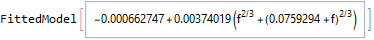
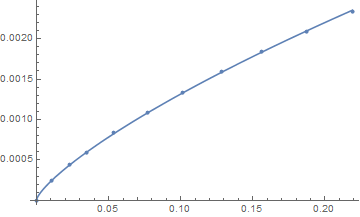

In [36]:
(*Fitting to the Hertzian contact model.*)
processData[currData_, m0_, r_]:=
    (
        forceTot = Transpose[currData][[2]]*9.81/1000;
        disp = -Transpose[currData][[1]];
        disp = disp - Min[disp];
        disp = disp*0.00001;
        m = NonlinearModelFit[Transpose[{forceTot, disp}], 
                      k*(f^(2/3) + (f+m0*9.81)^(2/3)) + b, 
                      {k, {b, 0}},f];
        plotIllus = Show[ListPlot[Transpose[{forceTot, disp}]], Plot[m[f], {f, Min[forceTot], Max[forceTot]}]];
        EE = k^(-3/2)*0.75*(1-0.5*0.5)*r^(-1/2)/.m[[1]][[2]];
        kErr = m["ParameterErrors"][[1]];
        EEerr = kErr/k*3/2*EE/.m[[1]][[2]];
        Return[{EE, EEerr, m, plotIllus}];
    )
res = processData[data, m0, d/2];
Print[res[[1;;2]]]
res[[3]]
Show[res[[4]]]
(*Note that due to the error in radius computation, the correct value of E and its error should be*)
(*reduced by a factor of Sqrt[2]*)